<a href="https://colab.research.google.com/github/IslamelGebaly/DPPTasksEpsilon/blob/main/IslamElgebaly_Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 7 (Feature Transformations #2)
Using loan_dasta.csv and apply what you learned in data preprocessing lectures.

## 1. Introduction

### 1.1. Importing Libraries

In [277]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer

### 1.2. Reading Data

In [278]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [279]:
df = pd.read_csv("drive/MyDrive/Datasets/loan_data.csv")

In [280]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### 1.3. Modifying Column names

In [281]:
df.columns = df.columns.str.replace(".", "_", regex =False)

## 2. Data Exploration

### 2.1. Displaying Basic Info

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int_rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log_annual_inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days_with_cr_line  9578 non-null   float64
 8   revol_bal          9578 non-null   int64  
 9   revol_util         9578 non-null   float64
 10  inq_last_6mths     9578 non-null   int64  
 11  delinq_2yrs        9578 non-null   int64  
 12  pub_rec            9578 non-null   int64  
 13  not_fully_paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [283]:
df.shape

(9578, 14)

In [284]:
df.describe()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [285]:
df.purpose.describe()

count                   9578
unique                     7
top       debt_consolidation
freq                    3957
Name: purpose, dtype: object

### 2.2. Examining number of uniques

In [286]:
df.nunique()

credit_policy           2
purpose                 7
int_rate              249
installment          4788
log_annual_inc       1987
dti                  2529
fico                   44
days_with_cr_line    2687
revol_bal            7869
revol_util           1035
inq_last_6mths         28
delinq_2yrs            11
pub_rec                 6
not_fully_paid          2
dtype: int64

### 2.3. Examining number of nulls

In [287]:
df.isna().sum()

credit_policy        0
purpose              0
int_rate             0
installment          0
log_annual_inc       0
dti                  0
fico                 0
days_with_cr_line    0
revol_bal            0
revol_util           0
inq_last_6mths       0
delinq_2yrs          0
pub_rec              0
not_fully_paid       0
dtype: int64

2.4. Examining the Purpose Column

In [288]:
df.purpose.unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

### 2.5. Examining the credit_policy column

<Axes: xlabel='credit_policy', ylabel='Count'>

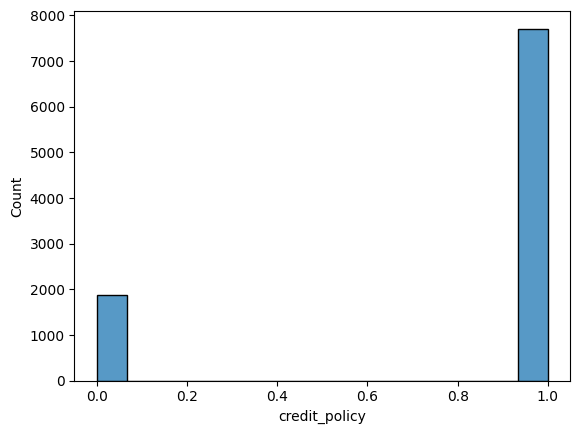

In [289]:
sns.histplot(df.credit_policy)

### 2.6. Examining the int_rate column

<Axes: xlabel='int_rate', ylabel='Count'>

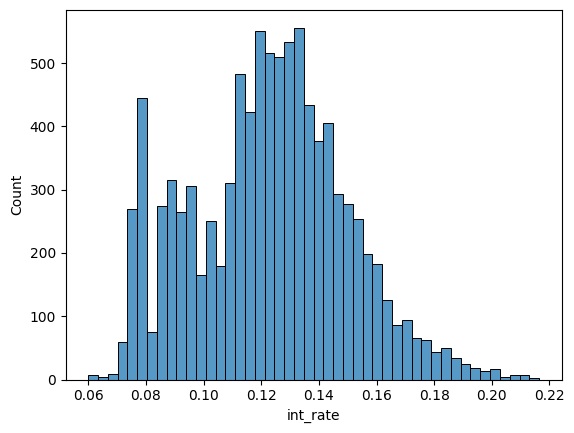

In [290]:
sns.histplot(df.int_rate)

### 2.7. Examining the installment column

<Axes: xlabel='installment', ylabel='Count'>

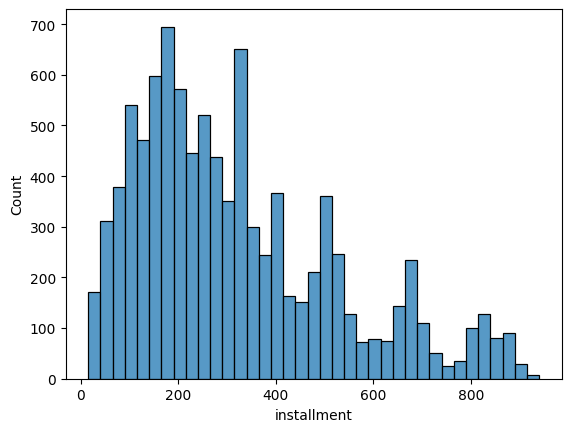

In [291]:
sns.histplot(df.installment)

<Axes: >

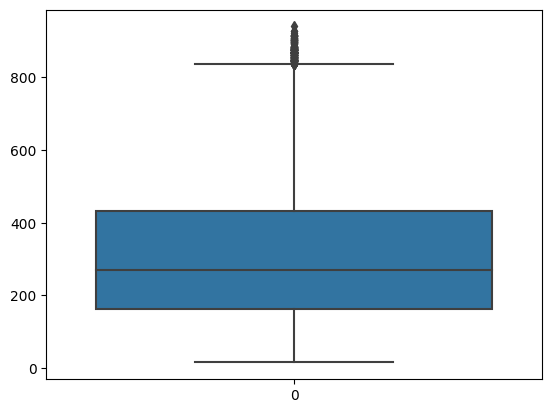

In [292]:
sns.boxplot(df.installment)

### 2.8. Examining the log_annual_inc

<Axes: xlabel='log_annual_inc', ylabel='Density'>

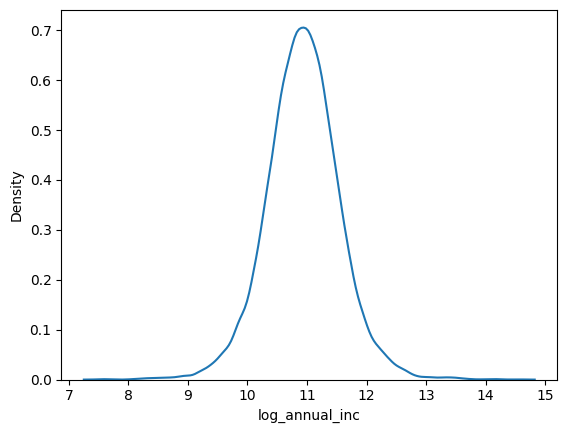

In [293]:
sns.kdeplot(df.log_annual_inc)

### 2.9. Examining the dti column

<Axes: xlabel='dti', ylabel='Density'>

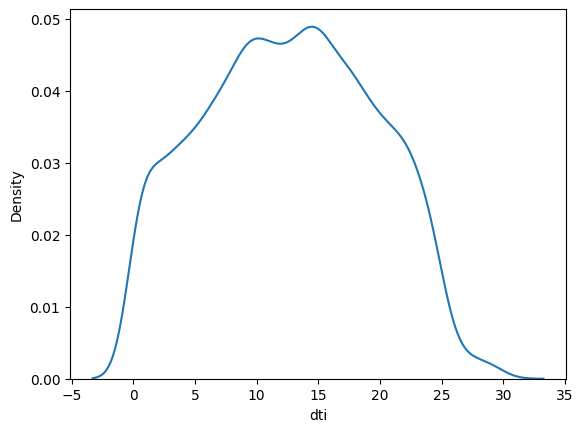

In [294]:
sns.kdeplot(df.dti)

### 2.10. Examining the fico column

<Axes: xlabel='fico', ylabel='Density'>

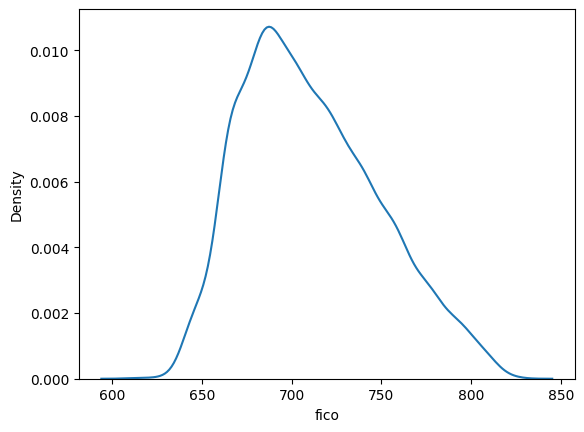

In [295]:
sns.kdeplot(df.fico)

### 2.11. Examining the days_with_cr_line column

<Axes: >

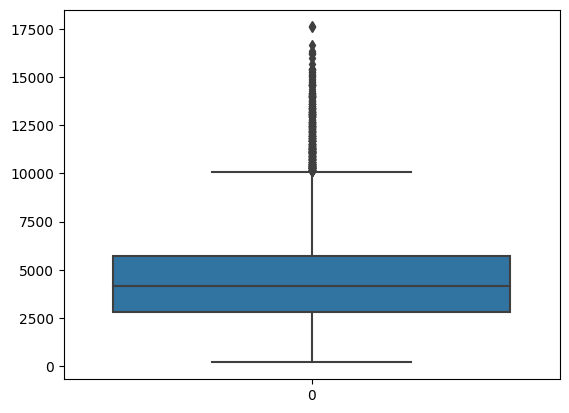

In [296]:
sns.boxplot(df.days_with_cr_line)

### 2.12. Examining the revol_bal column

<Axes: xlabel='revol_bal', ylabel='Density'>

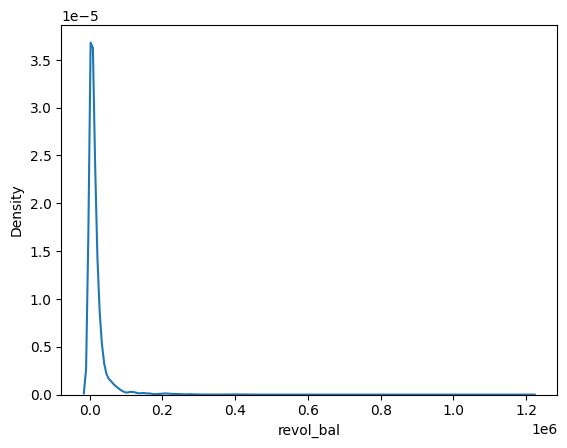

In [297]:
sns.kdeplot(df.revol_bal)

### 2.13. Examining the revol_util column

<Axes: xlabel='revol_util', ylabel='Density'>

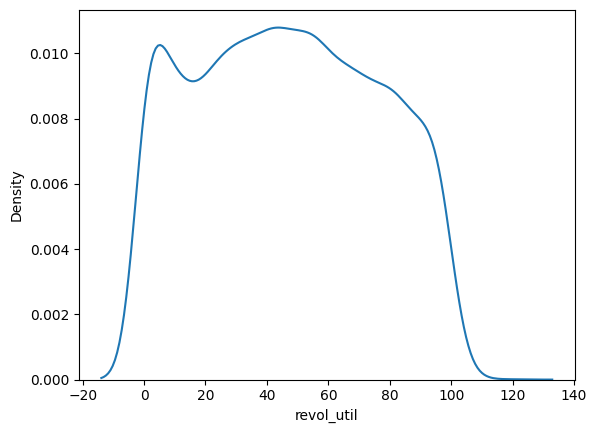

In [298]:
sns.kdeplot(df.revol_util)

### 2.14. Examining the inq_last_6mths column

<Axes: xlabel='inq_last_6mths', ylabel='Count'>

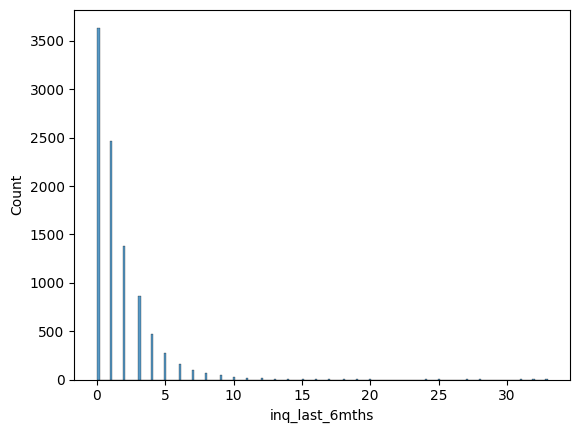

In [299]:
sns.histplot(df.inq_last_6mths)

### 2.15. Examining the delinq_2yrs column

<Axes: xlabel='delinq_2yrs', ylabel='Count'>

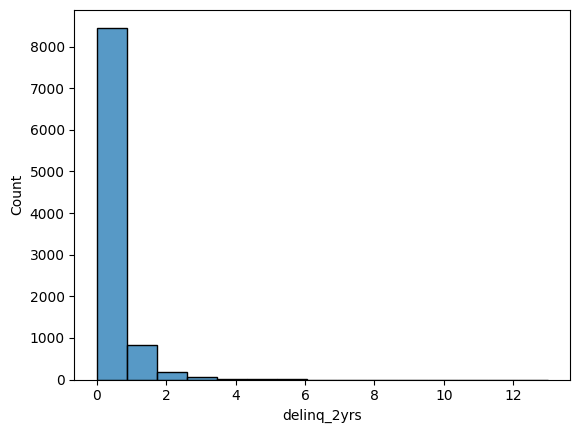

In [300]:
sns.histplot(df.delinq_2yrs)

### 2.16. Examining the pub_rec column

<Axes: xlabel='pub_rec', ylabel='Count'>

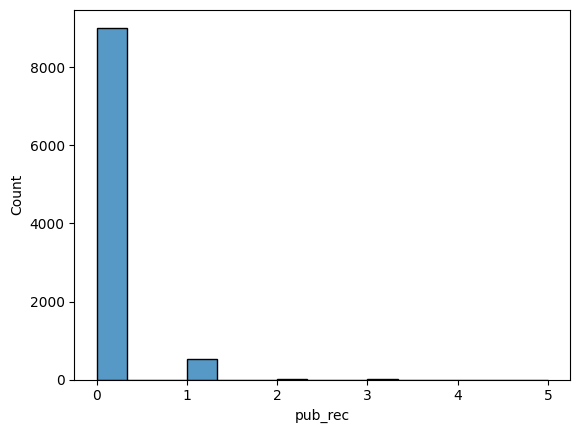

In [301]:
sns.histplot(df.pub_rec)

### 2.17. Examining the not_fully_paid column

<Axes: xlabel='not_fully_paid', ylabel='Count'>

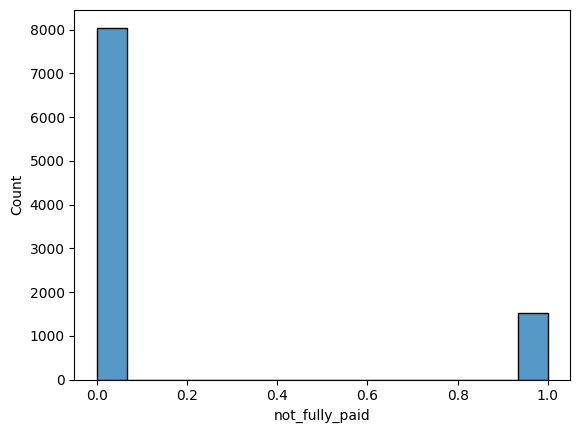

In [302]:
sns.histplot(df.not_fully_paid)

## 3. Data Cleaning

### 3.1. Removing Outliers

In [303]:
def remove_outlier(col):
  global df
  Q1 = df[col].quantile(.25)
  Q3 = df[col].quantile(.75)
  IQR = Q3 - Q1

  df.loc[df[col] < Q1 - IQR * 1.5, col] = np.nan
  df.loc[df[col] > Q3 + IQR * 1.5, col] = np.nan

imputer = KNNImputer()

In [305]:
for col in df.columns:
  if col not in ["purpose", "credit_policy", "delinq_2yrs", "not_fully_paid", "pub_rec"]:
    if df[col].dtype == "float64":
      remove_outlier(col)
      df[col] = imputer.fit_transform(df[[col]])
    else:
      remove_outlier(col)
      df.loc[df[col] == np.nan, col] = df[col].median()
      df[col] = df[col].astype("int64")

int64
object
float64
float64
float64
float64
float64
float64
int64
float64
int64
int64
int64
int64


### 3.2. Visualization

<Axes: xlabel='int_rate', ylabel='Count'>

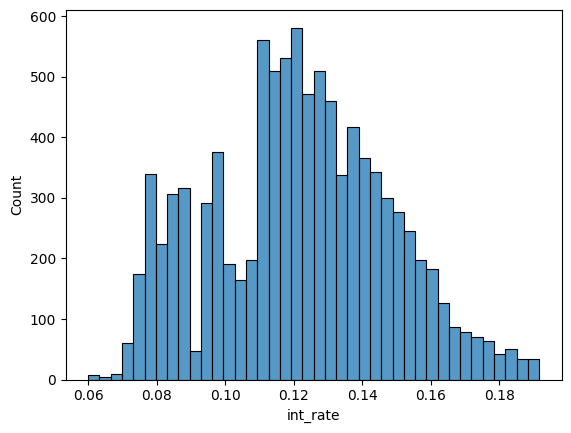

In [306]:
sns.histplot(df.int_rate)

<Axes: xlabel='installment', ylabel='Count'>

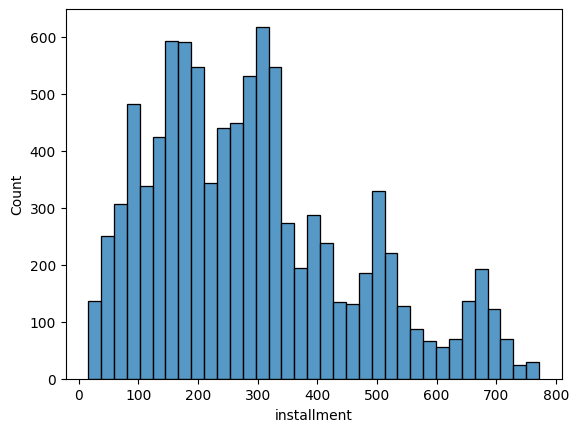

In [307]:
sns.histplot(df.installment)

<Axes: xlabel='log_annual_inc', ylabel='Density'>

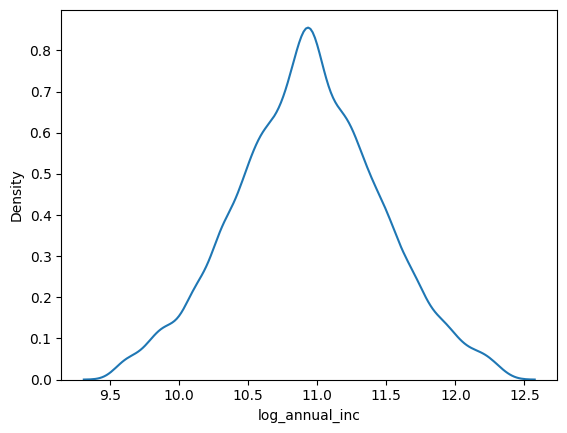

In [309]:
sns.kdeplot(df.log_annual_inc)

<Axes: xlabel='dti', ylabel='Density'>

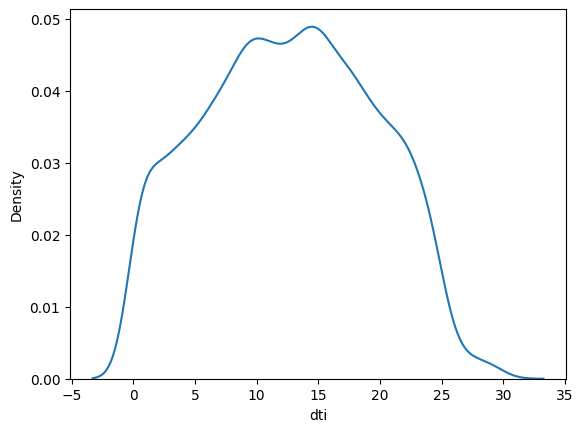

In [310]:
sns.kdeplot(df.dti)

<Axes: xlabel='fico', ylabel='Density'>

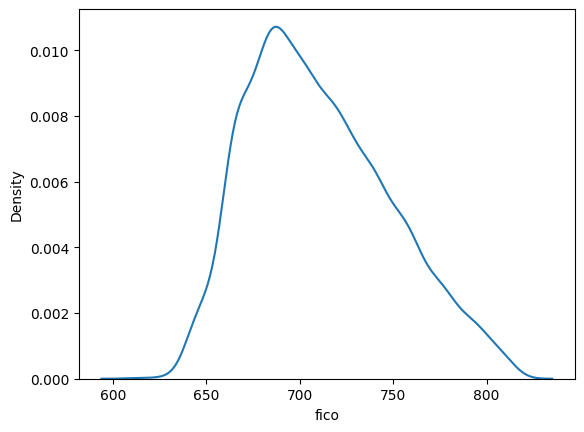

In [311]:
sns.kdeplot(df.fico)

<Axes: >

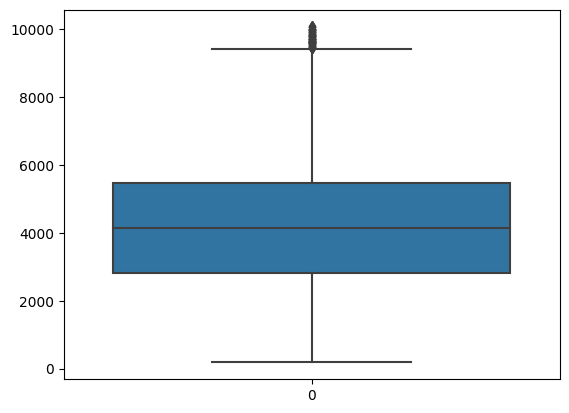

In [312]:
sns.boxplot(df.days_with_cr_line)

<Axes: xlabel='revol_bal', ylabel='Density'>

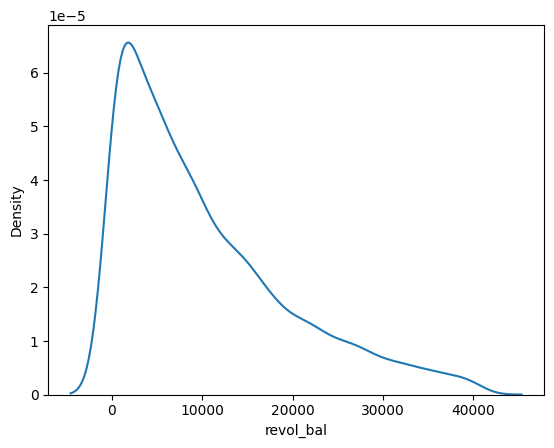

In [313]:
sns.kdeplot(df.revol_bal)

<Axes: xlabel='revol_util', ylabel='Density'>

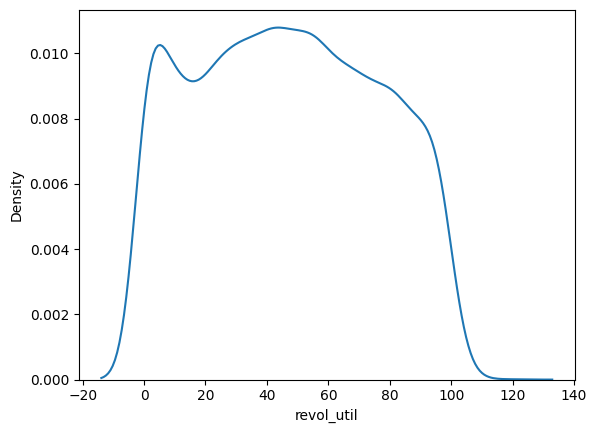

In [314]:
sns.kdeplot(df.revol_util)

<Axes: xlabel='inq_last_6mths', ylabel='Count'>

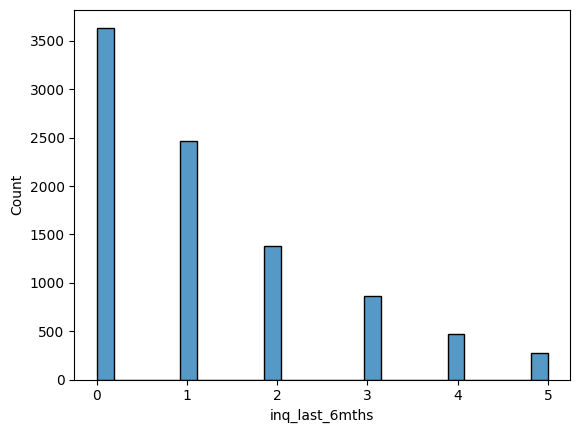

In [315]:
sns.histplot(df.inq_last_6mths)